## Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px


## importing data

In [61]:

raw_dataset = pd.read_csv('./kidney_disease.csv')

# making csv a pandas dataframe
dataframe = pd.DataFrame(raw_dataset)

## Formating datatype

In [62]:
# setting random seeds
np.random.seed(42)

# dropping 'id' column
dataframe.drop('id', axis = 1, inplace = True)


# rename column names to make it more user-friendly
dataframe.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [63]:
# converting necessary columns to numerical type
dataframe['packed_cell_volume'] = pd.to_numeric(dataframe['packed_cell_volume'], errors='coerce')
dataframe['white_blood_cell_count'] = pd.to_numeric(dataframe['white_blood_cell_count'], errors='coerce')
dataframe['red_blood_cell_count'] = pd.to_numeric(dataframe['red_blood_cell_count'], errors='coerce')


# Extracting categorical and numerical columns
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object']


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\ProgramData\Anaconda3\lib\site-pac

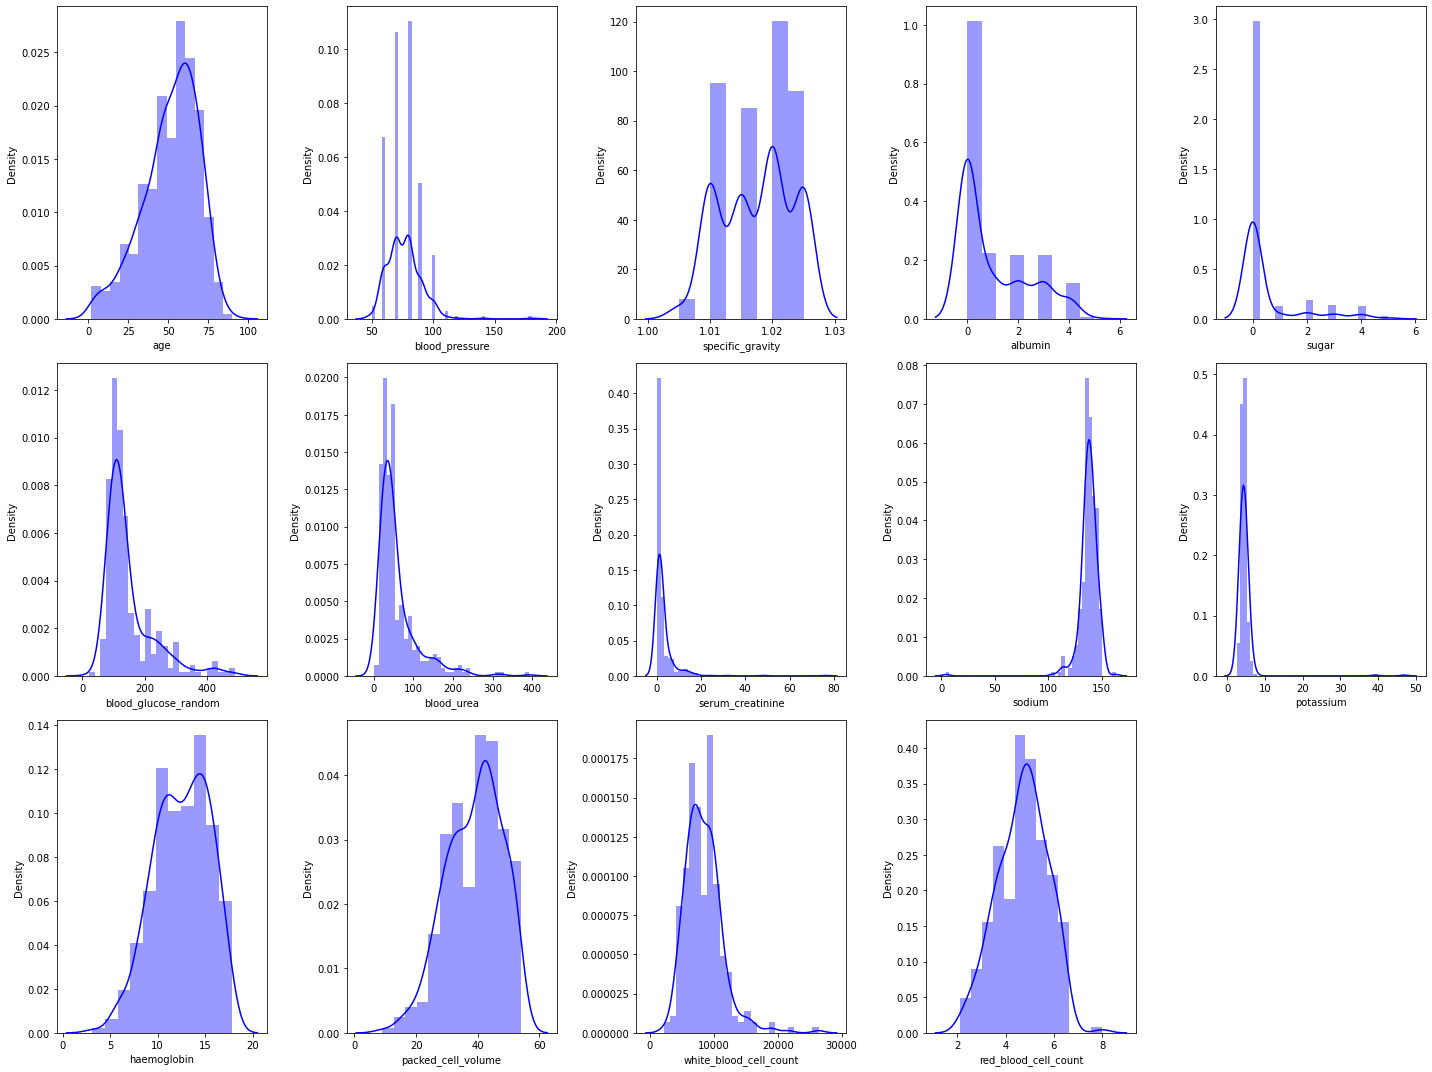

In [64]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(dataframe[column],color='blue',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

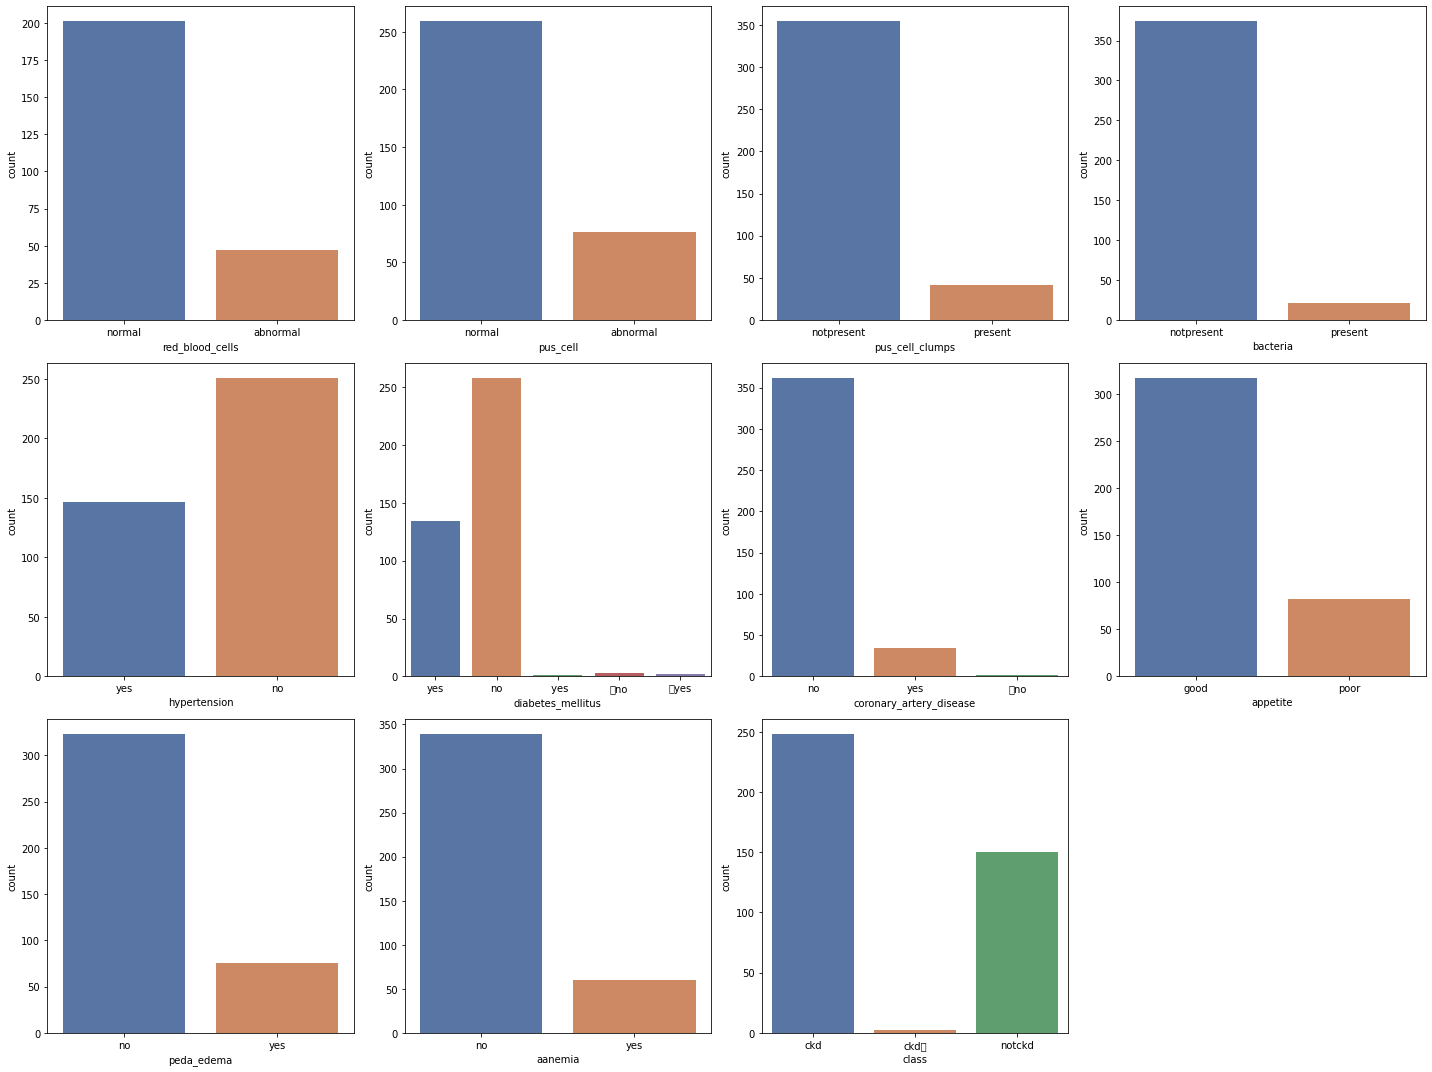

In [65]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(dataframe[column], palette = 'deep',color='black')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [66]:
# replace incorrect values
dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataframe['coronary_artery_disease'] = dataframe['coronary_artery_disease'].replace(to_replace = '\tno', value='no')


dataframe['class'] = dataframe['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
dataframe['class'] = dataframe['class'].map({'ckd': 0, 'not ckd': 1})
dataframe['class'] = pd.to_numeric(dataframe['class'], errors='coerce')

In [67]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = dataframe[feature].dropna().sample(dataframe[feature].isna().sum())
    random_sample.index = dataframe[dataframe[feature].isnull()].index
    dataframe.loc[dataframe[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dataframe[feature].mode()[0]
    dataframe[feature] = dataframe[feature].fillna(mode)



# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)


# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)


## Feature Encoding

In [68]:
le = LabelEncoder()

for col in cat_cols:
    dataframe[col] = le.fit_transform(dataframe[col])


## Spliting Dataset

In [69]:
# X = feature matrix
X = dataframe.drop("class", axis=1)     # everything except 'class' column

# Y = lables
Y = dataframe['class']      # only 'class' column

# spliting data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

## Selecting Models

### Randorm Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf_rand_forest = RandomForestClassifier()

clf_rand_forest.fit(X_train, Y_train)


RandomForestClassifier()

### SVM

In [71]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(X_train, Y_train)

SVC(kernel='linear')

### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, Y_train)

GaussianNB()

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(solver='lbfgs', max_iter=2500);
clf_log.fit(X_train, Y_train);

### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)

KNeighborsClassifier()

### XG_Boost

In [75]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)

clf_xgb.fit(X_train, Y_train)

[23:07:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

### Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(base_estimator = clf_dtc)
clf_ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

## Evaluation

### Random Forest

##### Classification Report

In [78]:
Y_pred = clf_rand_forest.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

rand_forest_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



##### Mean Absolute Error

In [79]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.0125

##### Root Mean Square Error

In [80]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.11180339887498948

##### Confusion Matrix

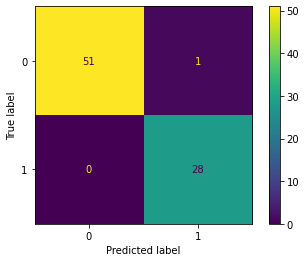

In [81]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_rand_forest.classes_)
disp.plot()
plt.show()

##### ROC

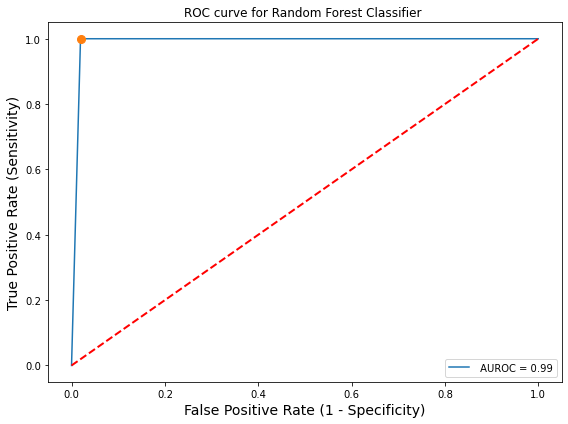

In [82]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Random Forest Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### SVM

##### Classification Report

In [83]:
Y_pred = clf_svm.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

svm_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.90      0.96      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



##### Mean Absolute Error

In [84]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.05

##### Root Mean Square Error

In [85]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.22360679774997896

##### Confusion Matrix

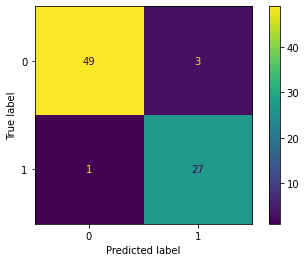

In [86]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

##### ROC

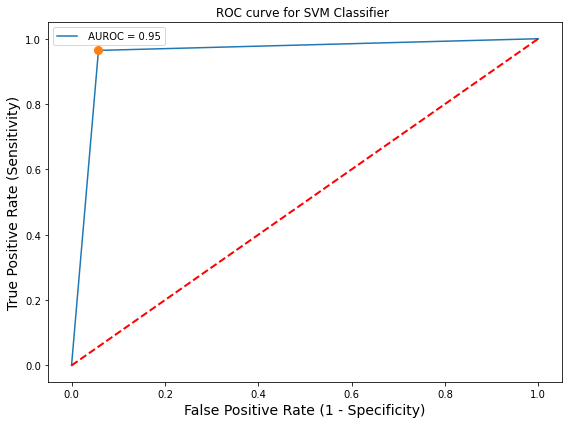

In [87]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVM Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Naive Bayes

##### Classification Report

In [88]:
Y_pred = clf_gnb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

gnb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



##### Mean Absolute Error

In [89]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.025

##### Root Mean Square Error

In [90]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.15811388300841897

##### Confusion Matrix

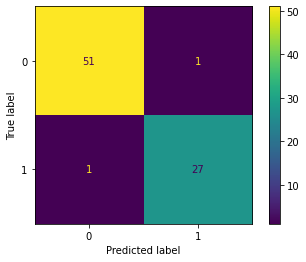

In [91]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_gnb.classes_)
disp.plot()
plt.show()

##### ROC

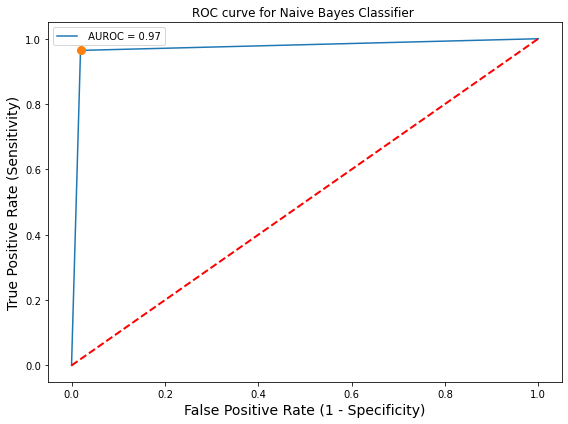

In [92]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Naive Bayes Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Logistic Regression

##### Classification Report

In [93]:
Y_pred = clf_log.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

log_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



##### Mean Absolute Error

In [94]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.0125

##### Root Mean Square Error

In [95]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.11180339887498948

##### Confusion Matrix

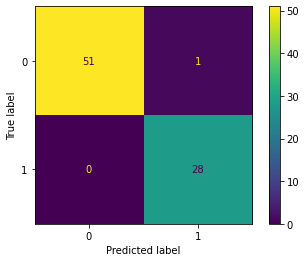

In [96]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_log.classes_)
disp.plot()
plt.show()

##### ROC

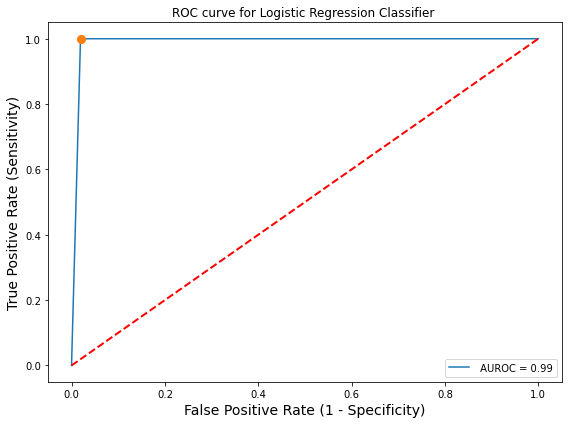

In [98]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Logistic Regression Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### KNN

##### Classification Report

In [99]:
Y_pred = clf_knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

knn_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        52
           1       0.57      0.89      0.69        28

    accuracy                           0.73        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80



##### Mean Absolute Error

In [100]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.275

##### Root Mean Square Error

In [101]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.5244044240850758

##### Confusion Matrix

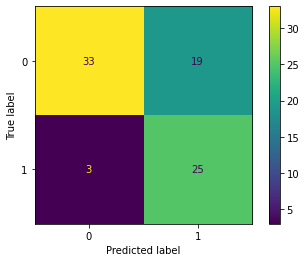

In [102]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_knn.classes_)
disp.plot()
plt.show()

##### ROC

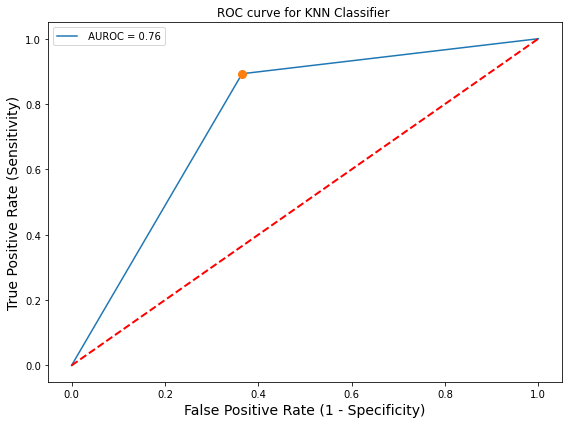

In [103]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for KNN Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### XG_Boost

##### Classification Report

In [104]:
Y_pred = clf_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

xgb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



##### Mean Absolute Error

In [105]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.025

##### Root Mean Square Error

In [106]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.15811388300841897

##### Confusion Matrix

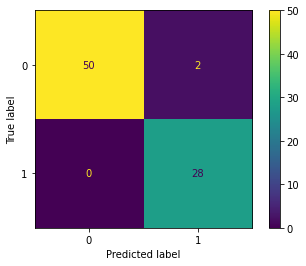

In [107]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

##### ROC

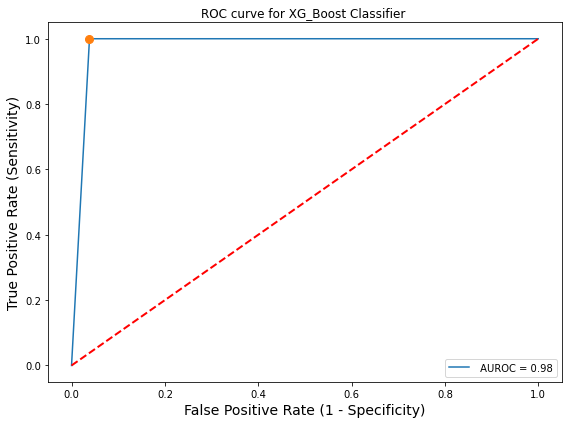

In [108]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XG_Boost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Decision Tree

##### Classification Report

In [109]:
Y_pred = clf_dtc.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

dtc_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



##### Mean Absolute Error

In [110]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.0375

##### Root Mean Square Error

In [111]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.19364916731037085

##### Confusion Matrix

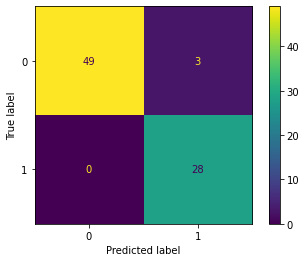

In [112]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_dtc.classes_)
disp.plot()
plt.show()

##### ROC

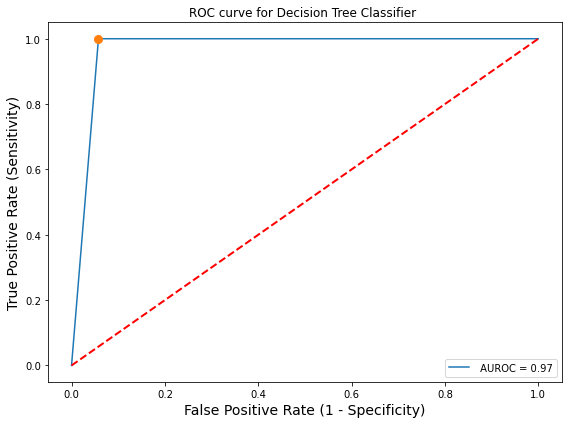

In [113]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Ada Boost

##### Classification Report

In [114]:
Y_pred = clf_ada.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

ada_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



##### Mean Absolute Error

In [115]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

0.025

##### Root Mean Square Error

In [116]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred, squared=False)

0.15811388300841897

##### Confusion Matrix

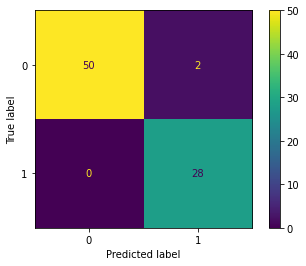

In [117]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_ada.classes_)
disp.plot()
plt.show()

##### ROC

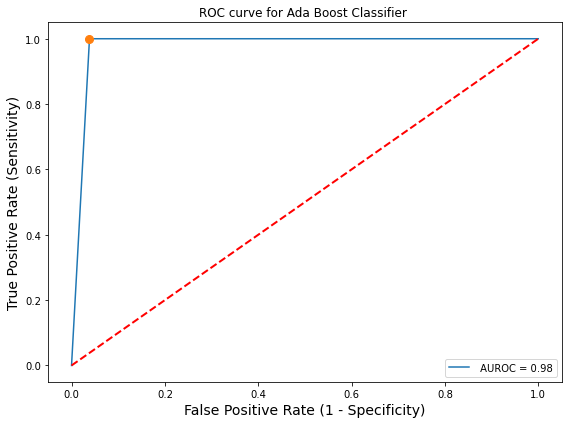

In [118]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Ada Boost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## Model Comparison

In [119]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier',
             'XG_Boost Classifier', 'Decision Tree Classifier', 'Ada_Boost Classifier'],
    'Score' : [rand_forest_acc, svm_acc, gnb_acc, knn_acc, xgb_acc, dtc_acc, ada_acc]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()